# Calculating z scores for VM subjects

In [1]:
import os
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Set current working directory
os.chdir('C:/Users/amu_k/subjects-mri-dwi/pre-processing-files/extracted-lab-regions')

# Excel file
excel = pd.ExcelFile('average_values.xlsx')

# Which tensor map-brain region?
df = excel.parse('fa-SP')

# Identify VM subjects
VM_rows = [3, 9, 54, 55, 140, 170]

# 3 - 31.86 weeks
# 9 - 32 weeks
# 54 - 25.71 weeks
# 55 - 33.29 weeks
# 140 - 29.71 weeks
# 170 - 29.57 weeks

#VM_subjects = df[df.index.isin(VM_rows)]
#normal_subjects = df[~df.index.isin(VM_rows)]

# Split normal subjects by GA: 26, 30, 32, and 33
# 26 GA - 25.50 - 26.49
# 30 GA - 29.50 - 30.49
# 32 GA - 31.50 - 32.49
# 33 GA - 32.50 - 33.49

GA_range = [
    (26, 25.5, 26.49),
    (30, 29.5, 30.49),
    (32, 31.5, 32.49),
    (33, 32.5, 33.49)
]

ga_ranges = [
    (21, 20.50, 21.49),
    (22 ,21.50, 22.49),
    (23, 22.50, 23.49),
    (24, 23.50, 24.49),
    (25, 24.50, 25.49),
    (26, 25.50, 26.49),
    (27, 26.50, 27.49),
    (28, 27.50, 28.49),
    (29, 28.50, 29.49),
    (30, 29.50, 30.49),
    (31, 30.50, 31.49),
    (32, 31.50, 32.49),
    (33, 32.50, 33.49),
    (34, 33.50, 34.49),
    (35, 34.50, 35.49),
    (36, 35.50, 36.49),
    (37, 36.50, 37.49),
    (38, 37.50, 38.49),
]


# Function to group subjects by GA
def group_subjects(GA):
    for label, lower, upper in GA_range:
        if lower <= GA <= upper:
            return f'{label} weeks'
    return 'Other'
    
# Apply function to GA column in dataframe
df['ga group'] = df['ga'].apply(group_subjects)

# Group by gestational age and save each group to a dictionary
grouped_data = {}
for group_name, group_data in df.groupby('ga group'):
# Calculate z scores for each GA: 26, 30, 32, and 33
    group_data['z_scores'] = zscore(group_data['average'])
    grouped_data[group_name] = group_data[['subject_name', 'ga', 'average', 'z_scores']]

# Print the keys (group names) of the grouped data
print("Group Names:", grouped_data.keys())

# Example: Accessing data for a specific group (e.g., '26 weeks')
#print("Data for 32 weeks group:")
#print(grouped_data['Other'])
#print(grouped_data)

# Display the full DataFrame
pd.set_option('display.max_rows', None)  # This will display all rows
pd.set_option('display.max_columns', None)  # This will display all columns
print(grouped_data['26 weeks'])

Group Names: dict_keys(['26 weeks', '30 weeks', '32 weeks', '33 weeks', 'Other'])
                   subject_name     ga   average  z_scores
11      sub-CC00877XX20_ses-820  26.43  0.121939 -0.889396
19     sub-CC00898XX25_ses-6231  26.43  0.156477  1.149581
33    sub-CC00922XX15_ses-11630  25.71  0.120755 -0.959286
54    sub-CC00960XX12_ses-23130  25.71  0.135172 -0.108172
62    sub-CC00973XX17_ses-29930  25.57  0.128697 -0.490435
75    sub-CC01001XX03_ses-39230  25.86  0.140154  0.185950
77    sub-CC01008XX10_ses-47430  26.14  0.150669  0.806735
90    sub-CC01029XX15_ses-59630  26.14  0.111563 -1.501919
113   sub-CC01089XX18_ses-72630  26.14  0.126478 -0.621413
124   sub-CC01114XX09_ses-82430  26.29  0.131158 -0.345144
125   sub-CC01115XX10_ses-87031  25.71  0.140687  0.217426
126   sub-CC01118XX13_ses-87631  25.86  0.123964 -0.769854
127   sub-CC01119XX14_ses-92230  26.29  0.151474  0.854224
139   sub-CC01138XX17_ses-95030  25.86  0.133964 -0.179452
145  sub-CC01147XX18_ses-101330  

In [2]:
# Filter and print z scores of VM subjects
#VM_subjects = df[df.index.isin(VM_rows)]
#print(VM_subjects[["subject_name", "z_scores", "ga"]])

# Find VM subject names
VM_subject_names = df.loc[VM_rows, 'subject_name']

# Print z-scores of VM subjects
for group_name, group_data in grouped_data.items():
    VM_subjects_in_group = group_data[group_data['subject_name'].isin(VM_subject_names)]
    if not VM_subjects_in_group.empty:
        print(f"Group: {group_name}")
        print(VM_subjects_in_group[['subject_name', 'z_scores']])

Group: 26 weeks
                 subject_name  z_scores
54  sub-CC00960XX12_ses-23130 -0.108172
Group: 30 weeks
                   subject_name  z_scores
140   sub-CC01141XX12_ses-99932 -0.505453
170  sub-CC01202XX06_ses-142630  0.730575
Group: 32 weeks
               subject_name  z_scores
3   sub-CC00865XX16_ses-621 -0.612789
9  sub-CC00875XX18_ses-2521 -0.438978
Group: 33 weeks
                 subject_name  z_scores
55  sub-CC00961XX13_ses-23830 -0.684408


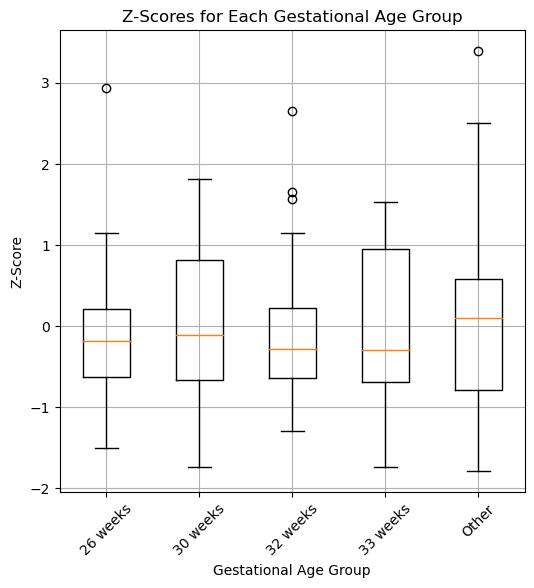

In [3]:
# Visualising z scores
plt.figure(figsize=(6, 6))
plt.boxplot([group['z_scores'] for group in grouped_data.values()], labels=grouped_data.keys())
plt.title('Z-Scores for Each Gestational Age Group')
plt.xlabel('Gestational Age Group')
plt.ylabel('Z-Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()